# Federalist Papers Authorhship Attribution


## Introduction & Description 

The Federalist Papers as described by Wikipedia are, "a series of 85 articles or essays advocating the ratification of the United States Constitution". These articles and essays were written by Alexander Hamilton, James Madison, and John Jay. With 12 of the 85 essays often having their authorship disputed. This project will use clustering & classification machine learning techniques in an attempt to find the most likely author/authors of these 12 disputed papers. 

## Data 

The first step in this process is to understand the data set that will make up the basis of the experiment. This project will use an csv file containing single words that appeared in 85 essays.

In [1]:
import pylab
import pandas
import pandas as pd

papers_data = pd.read_csv('lexos_1gram_prop.csv')
papers_data.head()

,Unnamed: 0,Total,Average,FED_18_C,FED_19_C,FED_20_C,FED_49_D,FED_50_D,FED_51_D,FED_52_D,...,FED_39_M,FED_40_M,FED_41_M,FED_42_M,FED_43_M,FED_44_M,FED_45_M,FED_46_M,FED_47_M,FED_48_M
0,the,7.9135,0.0931,0.1136,0.1015,0.0901,0.1077,0.0911,0.1052,0.1005,...,0.1148,0.0971,0.0946,0.0941,0.1037,0.1086,0.1308,0.1156,0.1191,0.0907
1,of,5.2608,0.0619,0.0639,0.0610,0.0533,0.0611,0.0541,0.0588,0.0546,...,0.0601,0.0575,0.0575,0.0661,0.0650,0.0590,0.0673,0.0618,0.0681,0.0536
2,to,3.1772,0.0374,0.0256,0.0288,0.0276,0.0351,0.0252,0.0260,0.0389,...,0.0348,0.0396,0.0335,0.0334,0.0326,0.0279,0.0311,0.0328,0.0237,0.0290
3,and,2.2978,0.0270,0.0374,0.0400,0.0355,0.0254,0.0298,0.0208,0.0200,...,0.0245,0.0330,0.0248,0.0345,0.0230,0.0303,0.0296,0.0279,0.0313,0.0274
4,in,1.9614,0.0231,0.0194,0.0200,0.0257,0.0206,0.0252,0.0260,0.0178,...,0.0279,0.0225,0.0177,0.0223,0.0160,0.0228,0.0188,0.0176,0.0226,0.0241


## Data Cleaning

The data should be further cleaned before it can be used for clustering. Starting with removing the "Total" and "Average" columns as they are unnecessary for the purposes of this project.

In [2]:
papers_data = papers_data.drop('Total', axis=1)

In [3]:
papers_data = papers_data.drop('Average', axis=1)

In [4]:
papers_data.head()

,Unnamed: 0,FED_18_C,FED_19_C,FED_20_C,FED_49_D,FED_50_D,FED_51_D,FED_52_D,FED_53_D,FED_54_D,...,FED_39_M,FED_40_M,FED_41_M,FED_42_M,FED_43_M,FED_44_M,FED_45_M,FED_46_M,FED_47_M,FED_48_M
0,the,0.1136,0.1015,0.0901,0.1077,0.0911,0.1052,0.1005,0.0894,0.1017,...,0.1148,0.0971,0.0946,0.0941,0.1037,0.1086,0.1308,0.1156,0.1191,0.0907
1,of,0.0639,0.0610,0.0533,0.0611,0.0541,0.0588,0.0546,0.0590,0.0584,...,0.0601,0.0575,0.0575,0.0661,0.0650,0.0590,0.0673,0.0618,0.0681,0.0536
2,to,0.0256,0.0288,0.0276,0.0351,0.0252,0.0260,0.0389,0.0336,0.0304,...,0.0348,0.0396,0.0335,0.0334,0.0326,0.0279,0.0311,0.0328,0.0237,0.0290
3,and,0.0374,0.0400,0.0355,0.0254,0.0298,0.0208,0.0200,0.0286,0.0190,...,0.0245,0.0330,0.0248,0.0345,0.0230,0.0303,0.0296,0.0279,0.0313,0.0274
4,in,0.0194,0.0200,0.0257,0.0206,0.0252,0.0260,0.0178,0.0207,0.0324,...,0.0279,0.0225,0.0177,0.0223,0.0160,0.0228,0.0188,0.0176,0.0226,0.0241


Next, the data set will be transposed for the sake of the clustering technique.

In [5]:
papers_data = papers_data.transpose()
papers_data.head()

,0,1,2,3,4,5,6,7,8,9,...,8716,8717,8718,8719,8720,8721,8722,8723,8724,8725
Unnamed: 0,the,of,to,and,in,a,be,that,it,is,...,extremities,extremes,extremely,extravagancies,extravagance,extraneous,extracts,extra,extortion,zealous
FED_18_C,0.1136,0.0639,0.0256,0.0374,0.0194,0.0175,0.0028,0.0099,0.0123,0.0047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FED_19_C,0.1015,0.061,0.0288,0.04,0.02,0.0132,0.0068,0.0063,0.0093,0.0078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FED_20_C,0.0901,0.0533,0.0276,0.0355,0.0257,0.0184,0.0046,0.0059,0.0079,0.0099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FED_49_D,0.1077,0.0611,0.0351,0.0254,0.0206,0.02,0.0284,0.0127,0.0157,0.0109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
papers_data.drop(papers_data.index[0], axis=0, inplace=True)
papers_data.head()

,0,1,2,3,4,5,6,7,8,9,...,8716,8717,8718,8719,8720,8721,8722,8723,8724,8725
FED_18_C,0.1136,0.0639,0.0256,0.0374,0.0194,0.0175,0.0028,0.0099,0.0123,0.0047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FED_19_C,0.1015,0.061,0.0288,0.04,0.02,0.0132,0.0068,0.0063,0.0093,0.0078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FED_20_C,0.0901,0.0533,0.0276,0.0355,0.0257,0.0184,0.0046,0.0059,0.0079,0.0099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FED_49_D,0.1077,0.0611,0.0351,0.0254,0.0206,0.02,0.0284,0.0127,0.0157,0.0109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FED_50_D,0.0911,0.0541,0.0252,0.0298,0.0252,0.0126,0.028,0.0108,0.0144,0.0054,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Clustering

Using the .index method, the label for each Federalist Paper is obtained and indexed.

In [7]:
leaves = list(papers_data.index)
print(leaves)

['FED_18_C', 'FED_19_C', 'FED_20_C', 'FED_49_D', 'FED_50_D', 'FED_51_D', 'FED_52_D', 'FED_53_D', 'FED_54_D', 'FED_55_D', 'FED_56_D', 'FED_57_D', 'FED_58_D', 'FED_62_D', 'FED_63_D', 'FED_1_H', 'FED_6_H', 'FED_7_H', 'FED_8_H', 'FED_9_H', 'FED_11_H', 'FED_12_H', 'FED_13_H', 'FED_15_H', 'FED_16_H', 'FED_17_H', 'FED_21_H', 'FED_22_H', 'FED_23_H', 'FED_24_H', 'FED_25_H', 'FED_26_H', 'FED_27_H', 'FED_28_H', 'FED_29_H', 'FED_30_H', 'FED_31_H', 'FED_32_H', 'FED_33_H', 'FED_34_H', 'FED_35_H', 'FED_36_H', 'FED_59_H', 'FED_60_H', 'FED_61_H', 'FED_65_H', 'FED_66_H', 'FED_67_H', 'FED_68_H', 'FED_69_H', 'FED_70_H', 'FED_71_H', 'FED_72_H', 'FED_73_H', 'FED_74_H', 'FED_75_H', 'FED_76_H', 'FED_77_H', 'FED_78_H', 'FED_79_H', 'FED_80_H', 'FED_81_H', 'FED_82_H', 'FED_83_H', 'FED_84_H', 'FED_85_H', 'FED_2_J', 'FED_3_J', 'FED_4_J', 'FED_5_J', 'FED_64_J', 'FED_10_M', 'FED_14_M', 'FED_37_M', 'FED_38_M', 'FED_39_M', 'FED_40_M', 'FED_41_M', 'FED_42_M', 'FED_43_M', 'FED_44_M', 'FED_45_M', 'FED_46_M', 'FED_47_M', 

The indexes are then used as constants for each paper/author.

In [8]:
MIN_CO = 0
MAX_CO = 2

MIN_DIS = 3
MAX_DIS = 14

MIN_HAMILTON = 15
MAX_HAMILTON = 65

MIN_JAY = 66
MAX_JAY = 70

MIN_MADISON = 71
MAX_MADISON = 84


**I originally attempted to have all the data clustered in a single dendrogram, but this proved to be not useful for the purpose of the experiment. As all the data became difficult to read and make conclusions. So the following dendrogram will use 5 papers from each author with all the disputed papers**

In [9]:
Jay = papers_data.iloc[MIN_JAY:MAX_JAY+1,]
Jay_leaves = leaves[MIN_JAY:MAX_JAY+1]

Hamilton = papers_data.iloc[MIN_HAMILTON:MIN_HAMILTON+5]
Hamilton_leaves = leaves[MIN_HAMILTON:MIN_HAMILTON+5]

Madison = papers_data.iloc[MIN_MADISON:MIN_MADISON+5]
Madison_leaves = leaves[MIN_MADISON:MIN_MADISON+5]

Disputed = papers_data.iloc[MIN_DIS:MAX_DIS]
Disputed_leaves = leaves[MIN_DIS:MAX_DIS]

In [10]:
import pandas as pd 

In [11]:
frames = [Jay, Hamilton, Madison, Disputed]
vectors = pd.concat(frames)
theLeaves = Jay_leaves + Hamilton_leaves + Madison_leaves + Disputed_leaves

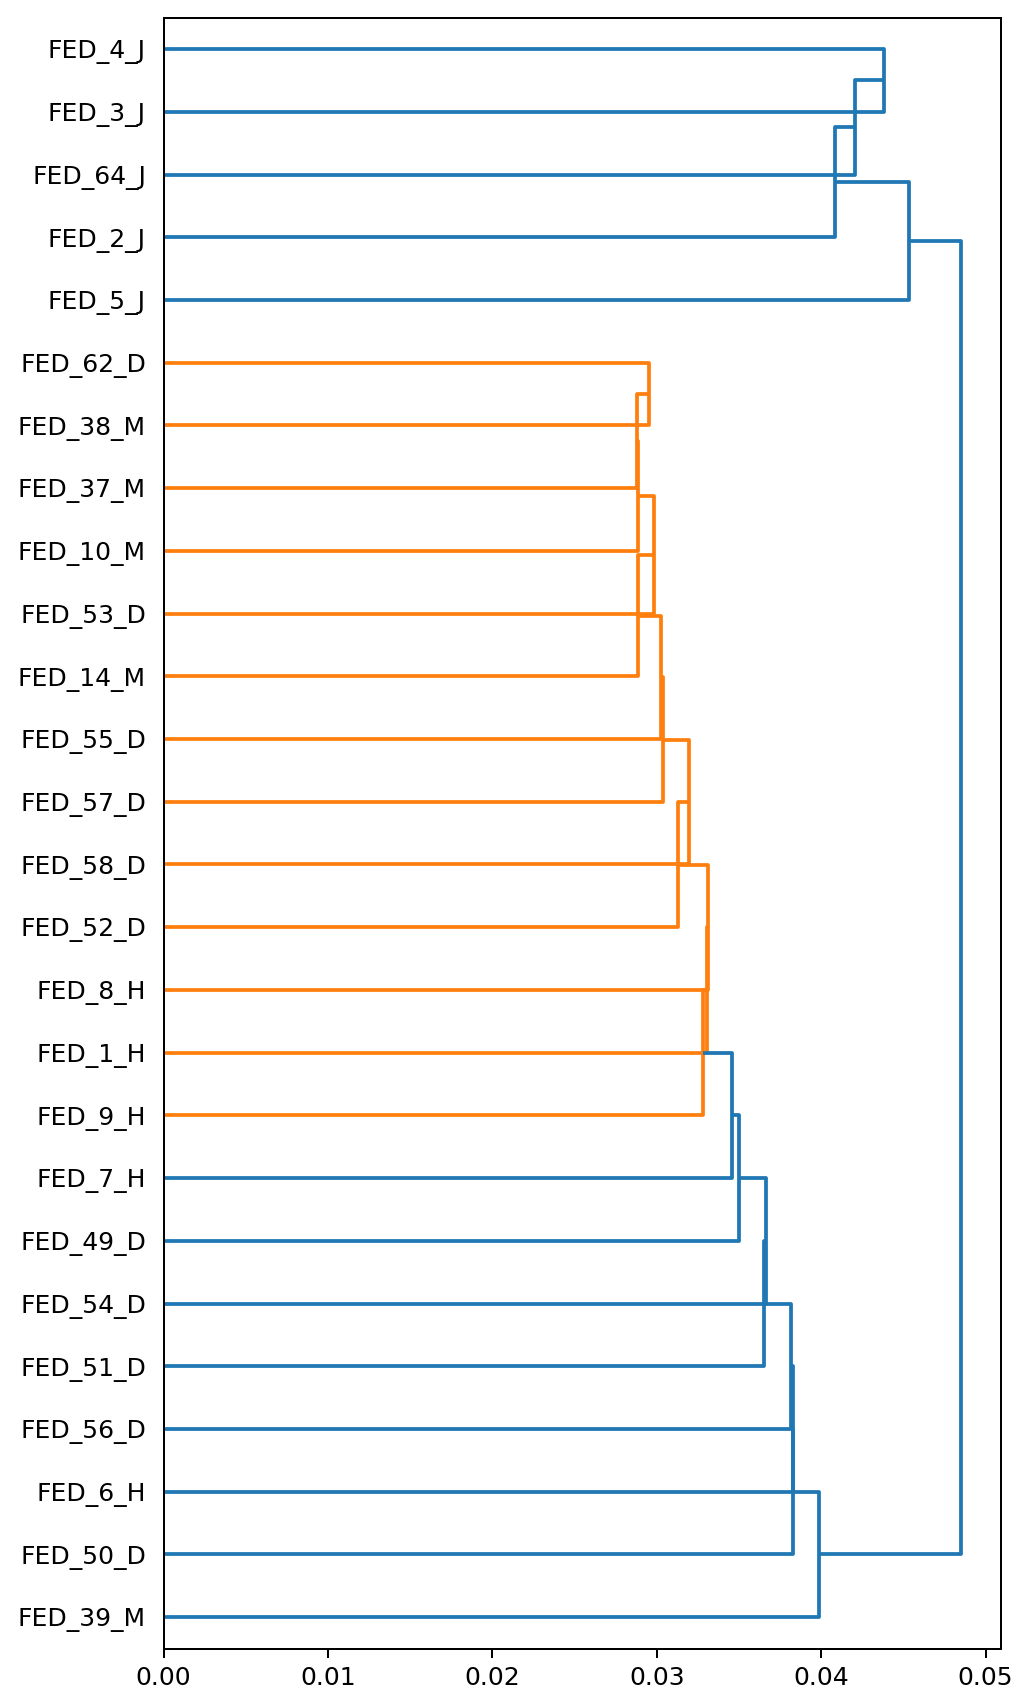

In [12]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
plt.figure(figsize=(6, 12), dpi=180)
Z = hierarchy.linkage(vectors, method='centroid', metric='euclidean' )
d = hierarchy.dendrogram( Z, orientation="right", leaf_rotation=0., labels=theLeaves)

## Classification

In [13]:
import pandas as pd
import pylab as pl
import numpy as np

import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline
# the output of plotting commands is displayed inline within frontends like the Jupyter notebook, 
# directly below the code cell that produced it. The resulting plots will then also be stored 
# in the notebook document.
 
import matplotlib.pyplot as plt

In [14]:
import csv
print(papers_data)

            0       1       2       3       4       5       6       7     \
FED_18_C  0.1136  0.0639  0.0256  0.0374  0.0194  0.0175  0.0028  0.0099   
FED_19_C  0.1015   0.061  0.0288    0.04    0.02  0.0132  0.0068  0.0063   
FED_20_C  0.0901  0.0533  0.0276  0.0355  0.0257  0.0184  0.0046  0.0059   
FED_49_D  0.1077  0.0611  0.0351  0.0254  0.0206    0.02  0.0284  0.0127   
FED_50_D  0.0911  0.0541  0.0252  0.0298  0.0252  0.0126   0.028  0.0108   
...          ...     ...     ...     ...     ...     ...     ...     ...   
FED_44_M  0.1086   0.059  0.0279  0.0303  0.0228  0.0148  0.0186  0.0097   
FED_45_M  0.1308  0.0673  0.0311  0.0296  0.0188  0.0094  0.0245  0.0141   
FED_46_M  0.1156  0.0618  0.0328  0.0279  0.0176   0.016  0.0275  0.0149   
FED_47_M  0.1191  0.0681  0.0237  0.0313  0.0226  0.0128  0.0128  0.0131   
FED_48_M  0.0907  0.0536   0.029  0.0274  0.0241  0.0188  0.0166  0.0145   

            8       9     ... 8716 8717    8718 8719 8720 8721 8722 8723 8724  \
FED_18

In [15]:
papers_data.index.name = "head"
papers_data.reset_index(inplace=True)

npArray = papers_data.to_numpy()
pdf = pd.DataFrame(npArray)

print(pdf)

        0       1       2       3       4       5       6       7       8     \
0   FED_18_C  0.1136  0.0639  0.0256  0.0374  0.0194  0.0175  0.0028  0.0099   
1   FED_19_C  0.1015   0.061  0.0288    0.04    0.02  0.0132  0.0068  0.0063   
2   FED_20_C  0.0901  0.0533  0.0276  0.0355  0.0257  0.0184  0.0046  0.0059   
3   FED_49_D  0.1077  0.0611  0.0351  0.0254  0.0206    0.02  0.0284  0.0127   
4   FED_50_D  0.0911  0.0541  0.0252  0.0298  0.0252  0.0126   0.028  0.0108   
..       ...     ...     ...     ...     ...     ...     ...     ...     ...   
80  FED_44_M  0.1086   0.059  0.0279  0.0303  0.0228  0.0148  0.0186  0.0097   
81  FED_45_M  0.1308  0.0673  0.0311  0.0296  0.0188  0.0094  0.0245  0.0141   
82  FED_46_M  0.1156  0.0618  0.0328  0.0279  0.0176   0.016  0.0275  0.0149   
83  FED_47_M  0.1191  0.0681  0.0237  0.0313  0.0226  0.0128  0.0128  0.0131   
84  FED_48_M  0.0907  0.0536   0.029  0.0274  0.0241  0.0188  0.0166  0.0145   

      9     ... 8717 8718    8719 8720 

In [16]:
x = pdf[[1,2,3,4,5,6,7,8,9,10]].values
y = pdf[[0]]

features = pdf.columns
classes = pdf[0].unique()
pdf.dtypes

0       object
1       object
2       object
3       object
4       object
         ...  
8722    object
8723    object
8724    object
8725    object
8726    object
Length: 8727, dtype: object

In [17]:
pdf[features[1]] = pdf[features[1]].astype('double')
pdf[features[2]] = pdf[features[2]].astype('double')
pdf[features[3]] = pdf[features[3]].astype('double')
pdf[features[4]] = pdf[features[4]].astype('double')
pdf[features[5]] = pdf[features[5]].astype('double')
pdf[features[6]] = pdf[features[6]].astype('double')
pdf[features[7]] = pdf[features[7]].astype('double')
pdf[features[8]] = pdf[features[8]].astype('double')
pdf[features[9]] = pdf[features[9]].astype('double')
pdf[features[10]] = pdf[features[10]].astype('double')

pdf.loc[pdf[0].str.contains('M', case = False), 0] = 'Madison'
pdf.loc[pdf[0].str.contains('C', case = False), 0] = "Cowrote"
pdf.loc[pdf[0].str.contains('J', case = False), 0] = "Jay"
pdf.loc[pdf[0].str.contains('H', case = False), 0] = "Hamilton"
pdf.loc[pdf[0].str.contains('D', case = True), 0] = "Disputed"


pdf.loc[pdf[0] == "Cowrote", 0] = 0
pdf.loc[pdf[0] == "Disputed", 0] = 1
pdf.loc[pdf[0] == "Madison", 0] = 2
pdf.loc[pdf[0] == "Jay", 0] = 3
pdf.loc[pdf[0] == "Hamilton", 0] = 4


pdf[0] = pdf[0].astype("int")




In [18]:
pdf = pdf.drop(labels=range(15,61), axis=0)
pdf = pdf.drop(labels=range(71,80), axis=0)
pdf = pdf.drop(labels=range(0,3), axis=0)
pdf = pdf.drop(labels=range(3,10), axis=0)

In [19]:
print(pdf)

    0       1       2       3       4       5       6       7       8     \
10     1  0.0871  0.0712  0.0248  0.0337  0.0197  0.0305  0.0229  0.0114   
11     1  0.0976  0.0682  0.0334  0.0244  0.0181  0.0167  0.0194  0.0140   
12     1  0.1019  0.0560  0.0292  0.0225  0.0278  0.0244  0.0249  0.0158   
13     1  0.0803  0.0606  0.0335  0.0289  0.0209  0.0314  0.0255  0.0146   
14     1  0.0953  0.0578  0.0289  0.0223  0.0223  0.0191  0.0197  0.0164   
61     4  0.0994  0.0633  0.0416  0.0225  0.0345  0.0222  0.0217  0.0125   
62     4  0.1086  0.0608  0.0537  0.0265  0.0246  0.0142  0.0233  0.0123   
63     4  0.0831  0.0567  0.0375  0.0207  0.0365  0.0238  0.0180  0.0207   
64     4  0.0933  0.0701  0.0335  0.0208  0.0218  0.0172  0.0225  0.0201   
65     4  0.0908  0.0635  0.0424  0.0269  0.0269  0.0251  0.0125  0.0125   
66     3  0.0640  0.0497  0.0317  0.0497  0.0203  0.0174  0.0090  0.0263   
67     3  0.0643  0.0428  0.0387  0.0415  0.0173  0.0090  0.0214  0.0138   
68     3  0.

In [20]:
pdf[0].value_counts()

1    5
4    5
3    5
2    5
Name: 0, dtype: int64

In [21]:
feature_df = pdf[[features[0], features[1], features[2], features[3], features[4], 
features[6], features[7], features[8], features[9], features[10]]]

X = np.asarray(feature_df)

y = np.asarray(pdf[0])

print(X.shape)
print(y.shape)

(20, 10)
(20,)


## Training/Test Sets

In [22]:
# creating a training/test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.2)

# print out the shapes of the training set and the testing set
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (16, 10) (16,)
Test set: (4, 10) (4,)


In [23]:
y_train

array([2, 2, 2, 1, 1, 4, 3, 2, 4, 1, 3, 3, 4, 1, 1, 4])

In [24]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [25]:
yhat = clf.predict(X_test)
yhat [0:5]

array([4, 4, 4, 2])

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/Users/bretlotti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bretlotti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bretlotti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         2
           4       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.44      0.67      0.50         4
weighted avg       0.33      0.50      0.38         4

Confusion matrix, without normalization
[[0 0 0 0]
 [0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]]


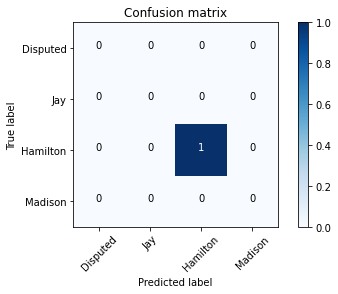

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Disputed",'Jay','Hamilton','Madison'],normalize= False,  title='Confusion matrix')

## Final Results



In Jocker's paper, Madison is attributed as the author of the 12 disputed papers in the majority of his experiments on the data. My own experiments on the data using clustering and classification supports these results, but a definitive conclusion cannot be reached by these experiments alone. The predictions are inconsistent, attributing Madison in most runs, but then predicting Hamilton during others. However, John Jay was never predicted to be an author of any of the 12 papers. So he can likely be ruled out as an author based on the predictions of my clustering and classification. 

The consistency of predictions was true across both the clustering and classification techniques.

To close, the author/authors of the disputed papers are still inconclusive. The most likely candidates supported by both Jockers and myself being Madison and Hamilton, but a final answer has yet to be reached.  